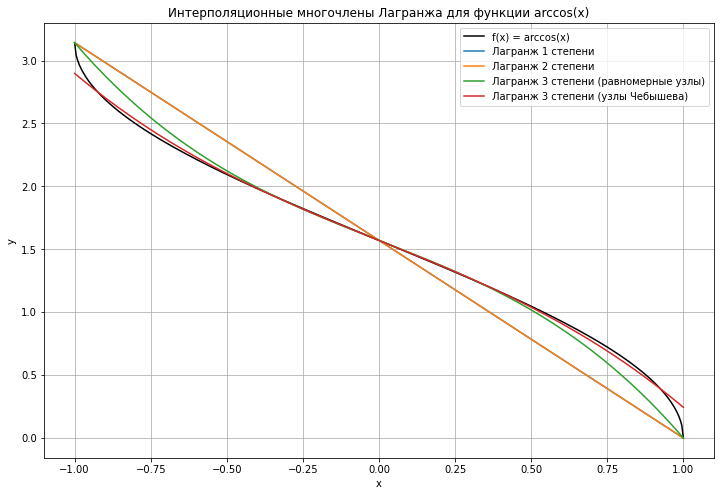

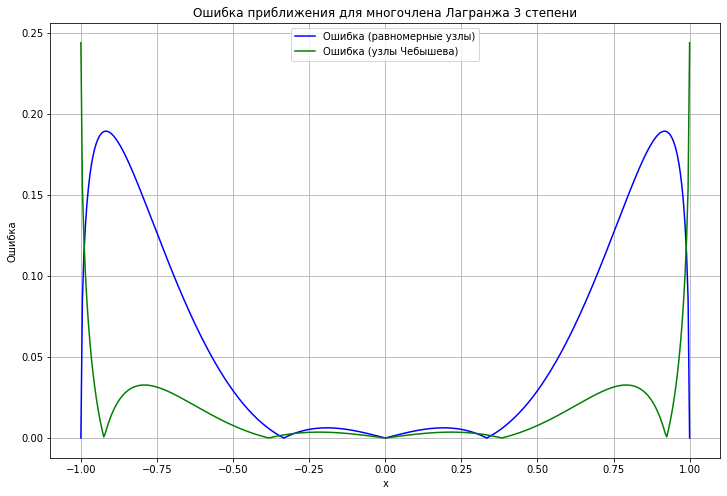

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Заданная функция
def f(x):
    return np.arccos(x)

# Интерполяционный многочлен Лагранжа
def lagrange_interpolation(x, y, t):
    n = len(x)
    L = 0
    for i in range(n):
        li = 1
        for j in range(n):
            if i != j:
                li *= (t - x[j]) / (x[i] - x[j])
        L += y[i] * li
    return L

# Узлы интерполяции для многочленов 1, 2 и 3 степеней
x_nodes_1 = np.linspace(-1, 1, 2)
x_nodes_2 = np.linspace(-1, 1, 3)
x_nodes_3_uniform = np.linspace(-1, 1, 4)
x_nodes_3_chebyshev = np.cos((2 * np.arange(4) + 1) * np.pi / (2 * 4))

# Значения функции в узлах
y_nodes_1 = f(x_nodes_1)
y_nodes_2 = f(x_nodes_2)
y_nodes_3_uniform = f(x_nodes_3_uniform)
y_nodes_3_chebyshev = f(x_nodes_3_chebyshev)

# Точки для построения графиков
t = np.linspace(-1, 1, 400)
f_values = f(t)

# Построение графиков
plt.figure(figsize=(12, 8))

# График функции
plt.plot(t, f_values, label='f(x) = arccos(x)', color='black')

# Интерполяция 1 степени
L1_values = [lagrange_interpolation(x_nodes_1, y_nodes_1, ti) for ti in t]
plt.plot(t, L1_values, label='Лагранж 1 степени')

# Интерполяция 2 степени
L2_values = [lagrange_interpolation(x_nodes_2, y_nodes_2, ti) for ti in t]
plt.plot(t, L2_values, label='Лагранж 2 степени')

# Интерполяция 3 степени (равномерные узлы)
L3_uniform_values = [lagrange_interpolation(x_nodes_3_uniform, y_nodes_3_uniform, ti) for ti in t]
plt.plot(t, L3_uniform_values, label='Лагранж 3 степени (равномерные узлы)')

# Интерполяция 3 степени (узлы Чебышева)
L3_chebyshev_values = [lagrange_interpolation(x_nodes_3_chebyshev, y_nodes_3_chebyshev, ti) for ti in t]
plt.plot(t, L3_chebyshev_values, label='Лагранж 3 степени (узлы Чебышева)')

# Настройка графиков
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяционные многочлены Лагранжа для функции arccos(x)')
plt.legend()
plt.grid(True)
plt.show()

# Вычисление ошибок приближения
error_uniform = np.abs(f_values - L3_uniform_values)
error_chebyshev = np.abs(f_values - L3_chebyshev_values)

# Построение графиков ошибок
plt.figure(figsize=(12, 8))
plt.plot(t, error_uniform, label='Ошибка (равномерные узлы)', color='blue')
plt.plot(t, error_chebyshev, label='Ошибка (узлы Чебышева)', color='green')
plt.xlabel('x')
plt.ylabel('Ошибка')
plt.title('Ошибка приближения для многочлена Лагранжа 3 степени')
plt.legend()
plt.grid(True)
plt.show()
